In [3]:
!pip install matplotlib pandas numpy ipywidgets


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import of libraries for working with spatial transcriptomics data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as w
w.IntSlider()

IntSlider(value=0)

Loading data

In [5]:
file_path = r"C:\Users\jarom\Documents\IV114_ST\data\SN048_A121573_Rep2\results_spatialDE\results.csv"
results = pd.read_csv(file_path)
print(results.head())

   Unnamed: 0           FSV  M           g          l     max_delta  \
0           0  2.060553e-09  4  AL627309.1  12.776932  4.851652e+08   
1           1  2.060553e-09  4  AP006222.2  12.776932  4.851652e+08   
2           2  1.734159e-01  4   LINC01409  12.776932  4.765093e+00   
3           3  1.173163e-01  4   LINC01128  12.776932  7.521769e+00   
4           4  2.834671e-02  4      FAM41C  12.776932  3.426747e+01   

         max_ll  max_mu_hat  max_s2_t_hat model     n    s2_FSV   s2_logdelta  \
0   9307.832713    4.260272  3.740982e-08    SE  2380  0.037160  6.337041e+15   
1  10993.320670    4.262815  3.745445e-08    SE  2380  4.580899  7.811940e+17   
2   6920.884150    4.237310  2.780458e+00    SE  2380  0.003979  1.872694e-01   
3   6278.894237    4.207219  1.920965e+00    SE  2380  0.007156  5.979708e-01   
4   8371.881520    4.255247  5.035227e-01    SE  2380  0.098221  9.943858e+01   

       time           BIC   max_ll_null       LLR      pval      qval  
0  0.007422 -1

Graph of the tissue with the color correspond to expression level of top 10 significance genes

In [8]:
# 1) Select top 10 genes based on q-value
top10 = results.sort_values('qval').head(10)[['g', 'l', 'qval']]

# Create maps (gene → l) and (gene → qval)
l_map = top10.set_index('g')['l'].to_dict()
qval_map = top10.set_index('g')['qval'].to_dict()

# Dropdown will contain only gene names
top10_genes = list(l_map.keys())

# 2) Function to plot a selected gene
def plot_gene(gene):
    l_value = l_map[gene]
    qval_value = qval_map[gene]
    
    title = f"{gene} | l = {l_value:.3f} | qval = {qval_value:.2e}"
    
    plt.figure(figsize=(10,3))
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[gene])
    plt.title(title)
    plt.axis('equal')
    plt.colorbar(ticks=[])
    plt.show()

# 3) Interactive gene selection
w.interact(
    plot_gene,
    gene=w.Dropdown(options=top10_genes, description="Gene:")
)


<Figure size 1000x300 with 0 Axes>

interactive(children=(Dropdown(description='Gene:', options=('SCIN', 'MLPH', 'RPL35', 'AK1', 'TPSG1', 'RPL7A',…

<function __main__.plot_gene(gene)>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

Volkano plot - the relation between significance and effect size. Efect size is the fraction of variance explained by spatial variation.

Text(0, 0.5, 'Adj. P-value')

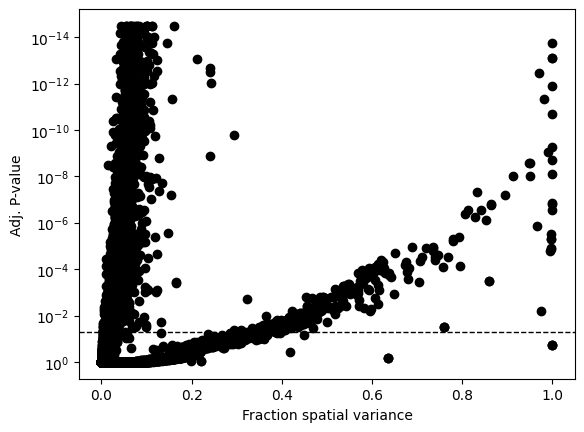

In [10]:
# figsize(5, 4)
plt.yscale('log')

plt.scatter(results['FSV'], results['qval'], c='black')

plt.axhline(0.05, c='black', lw=1, ls='--')

plt.gca().invert_yaxis()
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value')